In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_xdr is the DataFrame containing the dataset

# Aggregate metrics per customer
user_engagement = df_xdr.groupby('MSISDN/Number').agg({
    'Bearer Id': 'count',  # Session Frequency
    'Dur. (ms)': 'sum',  # Total Session Duration
    'Total DL (Bytes)': 'sum',  # Total Download Data
    'Total UL (Bytes)': 'sum'   # Total Upload Data
}).reset_index()

# Compute total traffic
user_engagement['Total Traffic (Bytes)'] = user_engagement['Total DL (Bytes)'] + user_engagement['Total UL (Bytes)']

# Report top 10 customers per engagement metric
top_10_sessions = user_engagement.nlargest(10, 'Bearer Id')
top_10_duration = user_engagement.nlargest(10, 'Dur. (ms)')
top_10_traffic = user_engagement.nlargest(10, 'Total Traffic (Bytes)')

print("Top 10 Customers by Session Frequency:")
print(top_10_sessions)

print("\nTop 10 Customers by Session Duration:")
print(top_10_duration)

print("\nTop 10 Customers by Total Traffic:")
print(top_10_traffic)


Top 10 Customers by Session Frequency:
       MSISDN/Number  Bearer Id   Dur. (ms)  Total DL (Bytes)  \
13526   3.362632e+10         54  26375781.0      2.190455e+10   
6437    3.361489e+10         51  29900694.0      2.447023e+10   
13180   3.362578e+10         51  55661262.0      2.331013e+10   
37052   3.365973e+10         48  12106284.0      2.124481e+10   
76363   3.367588e+10         45  14597841.0      2.192863e+10   
92923   3.376054e+10         45  27838302.0      2.343389e+10   
65118   3.366716e+10         39  26234742.0      1.515620e+10   
666     3.360313e+10         36  18863283.0      1.362182e+10   
1279    3.360452e+10         36  15623970.0      1.528824e+10   
13994   3.362708e+10         36  14110548.0      1.592844e+10   

       Total UL (Bytes)  Total Traffic (Bytes)  
13526      2.008952e+09           2.391350e+10  
6437       2.068449e+09           2.653868e+10  
13180      2.188732e+09           2.549886e+10  
37052      1.872781e+09           2.311759e+10  


In [8]:
# Normalize the metrics
features = ['Bearer Id', 'Dur. (ms)', 'Total Traffic (Bytes)']
scaler = StandardScaler()
user_engagement_normalized = scaler.fit_transform(user_engagement[features])

# Run K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
user_engagement['Cluster'] = kmeans.fit_predict(user_engagement_normalized)

# Compute statistics for each cluster
cluster_stats = user_engagement.groupby('Cluster').agg({
    'Bearer Id': ['min', 'max', 'mean', 'sum'],
    'Dur. (ms)': ['min', 'max', 'mean', 'sum'],
    'Total Traffic (Bytes)': ['min', 'max', 'mean', 'sum']
}).reset_index()

print("\nCluster Statistics:")
print(cluster_stats)



Cluster Statistics:
  Cluster Bearer Id                        Dur. (ms)              \
                min max       mean     sum       min         max   
0       0         3  54  13.199832   47229  199782.0  55661262.0   
1       1         0   6   3.067353  244830   21426.0   2632155.0   
2       2         3  12   6.541304  153459   54705.0   4442625.0   

                              Total Traffic (Bytes)                \
           mean           sum                   min           max   
0  1.968823e+06  7.044448e+09          1.111263e+09  2.653868e+10   
1  3.091904e+05  2.467896e+10          9.974703e+07  4.281301e+09   
2  6.450599e+05  1.513311e+10          3.554619e+08  7.538407e+09   

                               
           mean           sum  
0  6.859872e+09  2.454462e+13  
1  1.485168e+09  1.185431e+14  
2  3.342394e+09  7.841257e+13  


In [10]:
# Assuming df_xdr contains per-application traffic metrics
application_traffic = df_xdr.groupby('MSISDN/Number').agg({
    'Social Media DL (Bytes)': 'sum',
    'Google DL (Bytes)': 'sum',
    'Email DL (Bytes)': 'sum',
    'Youtube DL (Bytes)': 'sum',
    'Netflix DL (Bytes)': 'sum',
    'Gaming DL (Bytes)': 'sum',
    'Other DL (Bytes)': 'sum'
}).reset_index()

# Find top 10 most engaged users per application
top_users_per_app = {}
for app in ['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']:
    top_users_per_app[app] = application_traffic.nlargest(10, app)

print("\nTop 10 Users Per Application:")
for app, data in top_users_per_app.items():
    print(f"\n{app}:")
    print(data)



Top 10 Users Per Application:

Social Media DL (Bytes):
        MSISDN/Number  Social Media DL (Bytes)  Google DL (Bytes)  \
13526    3.362632e+10              128231511.0        348319365.0   
92923    3.376054e+10              117892938.0        265879596.0   
37052    3.365973e+10              104701332.0        272875647.0   
6437     3.361489e+10               83249232.0        281825124.0   
13180    3.362578e+10               79692363.0        323714217.0   
65118    3.366716e+10               71261259.0        215123478.0   
106137   3.378632e+10               70705965.0        236459430.0   
70960    3.366907e+10               70431141.0        164745648.0   
666      3.360313e+10               68330037.0        221826165.0   
31331    3.365849e+10               68087019.0        166372806.0   

        Email DL (Bytes)  Youtube DL (Bytes)  Netflix DL (Bytes)  \
13526        100214355.0         492146118.0         598437714.0   
92923         79313685.0         582204894.0   

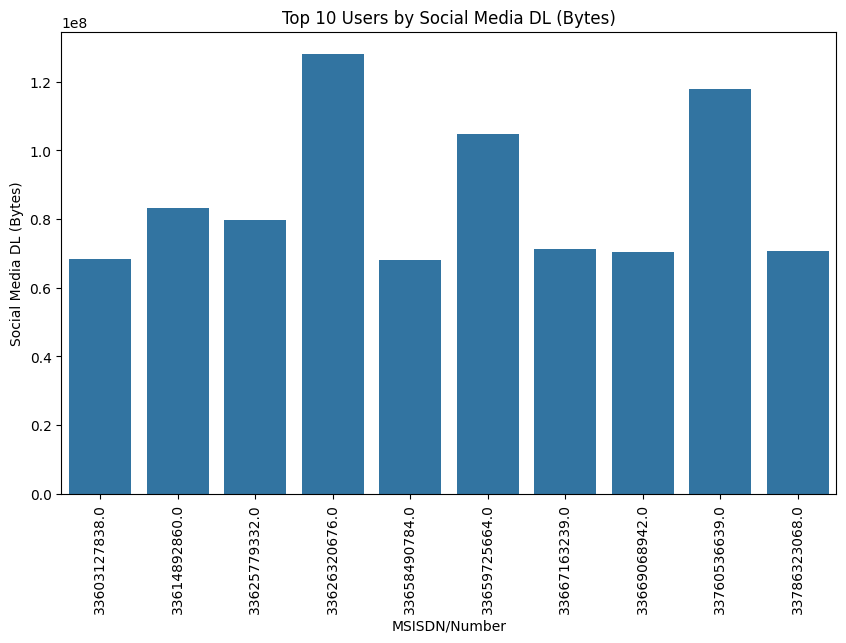

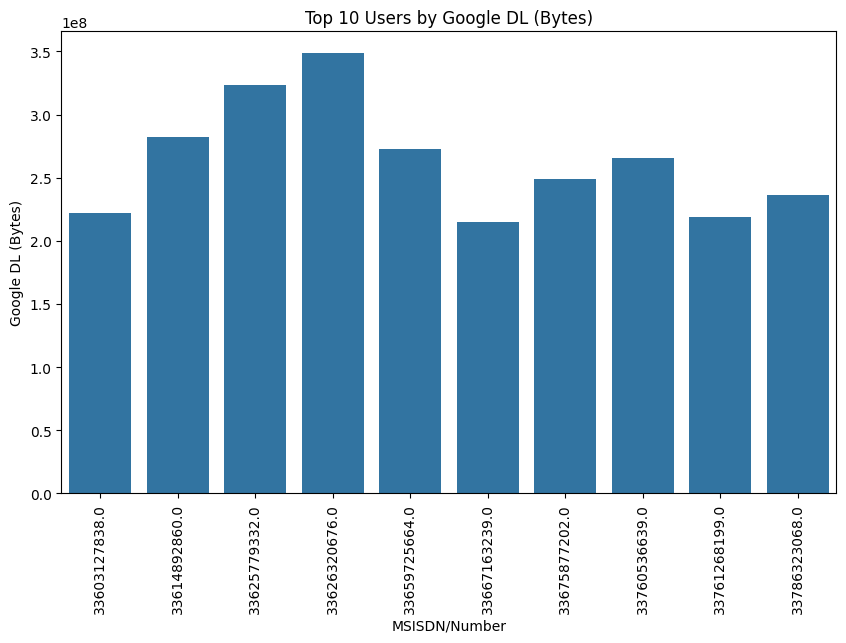

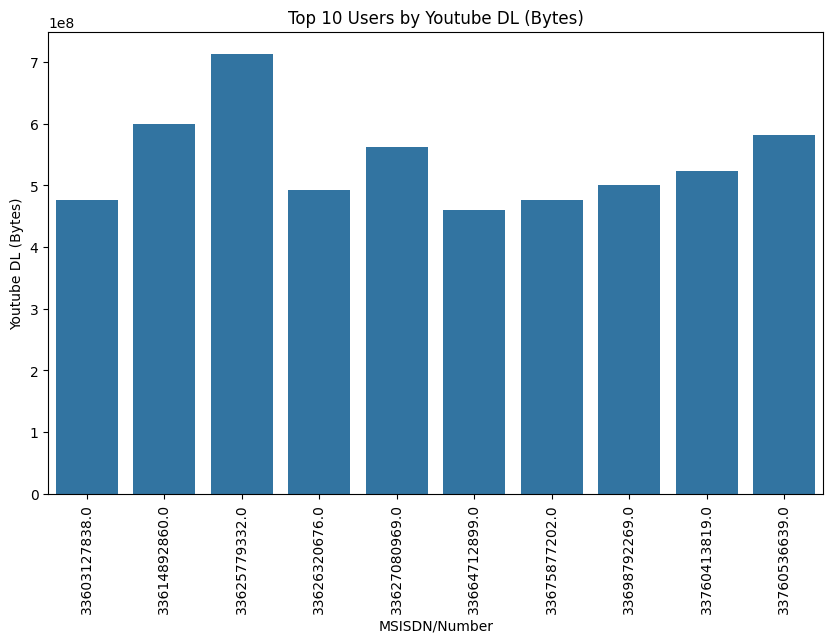

In [11]:
# Plot top 3 most used applications
top_apps = ['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Youtube DL (Bytes)']
for app in top_apps:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='MSISDN/Number', y=app, data=application_traffic.nlargest(10, app))
    plt.title(f'Top 10 Users by {app}')
    plt.xticks(rotation=90)
    plt.show()


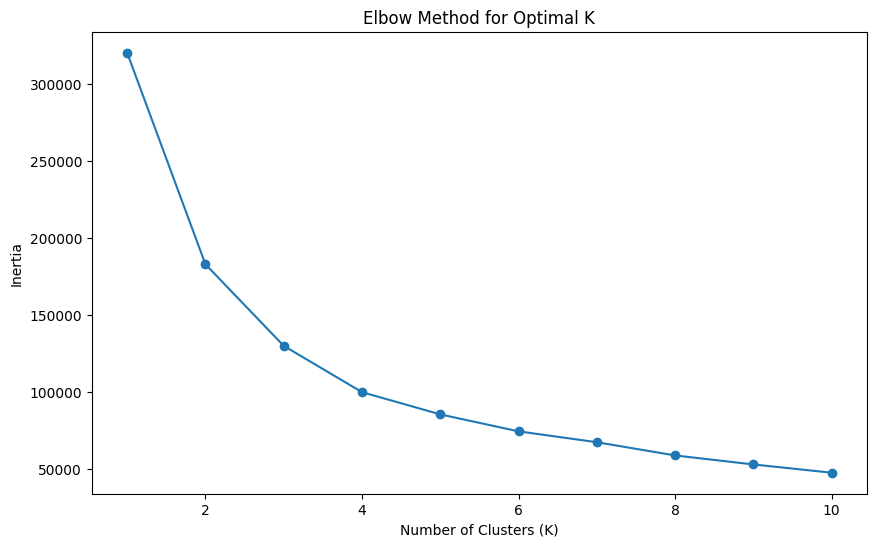

In [12]:
# Elbow method for optimal k
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(user_engagement_normalized)
    inertia.append(kmeans.inertia_)

# Plot Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()
